## Observations and Insights


In [124]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
study_results.head()

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
merged_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [125]:
# Checking the number of mice.
num_mice = len(pd.unique(merged_data["Mouse ID"]))
num_mice

249

In [126]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = merged_data.duplicated(subset=["Mouse ID", "Timepoint"])
duplicated_mice 

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [127]:
# Optional: Get all the data for the duplicate mouse ID. 
 
    


In [128]:
len(merged_data["Mouse ID"])

1893

In [129]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_data = merged_data.drop_duplicates()

In [130]:
# Checking the number of mice in the clean DataFrame.
len(mice_data["Mouse ID"])

1892

## Summary Statistics

In [131]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


avg_vol_per_drug = mice_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

med_vol_per_drug = mice_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

var_vol_per_drug = mice_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]

std_vol_per_drug = mice_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]

sem_vol_per_drug = mice_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({
    
    "Average Tumor Volume" : avg_vol_per_drug,
    "Median Tumor Volume": med_vol_per_drug,
    "Variance in Tumor Volume": var_vol_per_drug,
    "Standard Deviation in Tumor Volume": std_vol_per_drug,
    "Standard Error Margin": sem_vol_per_drug
    
})

summary_df.head(10)



,Average Tumor Volume,Median Tumor Volume,Variance in Tumor Volume,Standard Deviation in Tumor Volume,Standard Error Margin
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [132]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_vol_per_drug = mice_data.groupby(["Drug Regimen"]).agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
agg_vol_per_drug


/var/folders/8z/2pz_ss256bx1frzqs_0bv35h0000gn/T/ipykernel_62721/3559018803.py:4: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  agg_vol_per_drug = mice_data.groupby(["Drug Regimen"]).agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

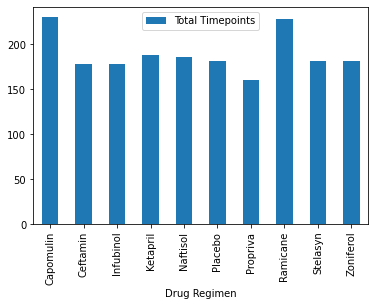

In [98]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_time_per_drug = mice_data.groupby(["Drug Regimen"]).count()["Timepoint"]
timepoints_df = pd.DataFrame({
     "Total Timepoints" : total_time_per_drug
 })

timepoints_df.plot.bar(y="Total Timepoints")

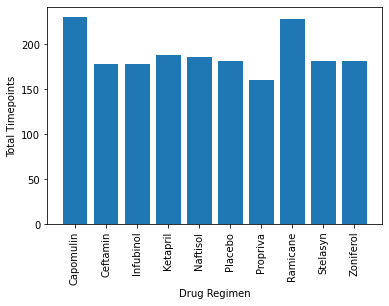

In [139]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_values = np.arange(0, 10, 1)

plt.bar(x_values, timepoints_df["Total Timepoints"])
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")
plt.xticks(x_values,summary_df.index, rotation="vertical")
plt.show()

In [143]:
num_mice_gender = mice_data.groupby(["Sex"]).count()["Mouse ID"]
num_mice_gender

Sex
Female    934
Male      958
Name: Mouse ID, dtype: int64

In [142]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_data.groupby(["Sex"]).count()["Mouse ID"]

Sex
Female    934
Male      958
Name: Mouse ID, dtype: int64

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
